<a href="https://colab.research.google.com/github/gundasai/deeplearning/blob/master/pcb%20raw%20now%20dng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
!pip install tensorflow==1.14.0

In [4]:
import os
os.chdir('/content/drive/My Drive/Raw_PCB')
os.getcwd()

'/content/drive/My Drive/Raw_PCB'

In [5]:
import numpy as np
a=np.load("s_x_train.npy")
b=np.load("s_y_train.npy")
print(a.shape)
print(b.shape)

(2669, 300, 300, 3)
(2669,)


In [0]:
from sklearn.utils import shuffle
(a,b)=shuffle(a,b)

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(a, b, test_size=0.33, random_state=42)

In [8]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(1788, 300, 300, 3)
(1788,)
(881, 300, 300, 3)
(881,)
4
uint8
4
uint8
4
uint8


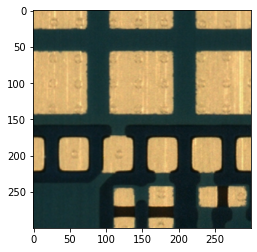

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='brg')

In [0]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [11]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788,)


In [12]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

255.0 255.0
0.0 0.0
1.0 1.0
0.0 0.0
50.90155
53.915752
3.7855067 3.7855067
-0.94409424 -0.94409424


In [13]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

[0. 1.]


In [14]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788, 2)


In [15]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import add
from keras.utils import plot_model
import keras

input1 = keras.layers.Input(shape=(300,300,3))

x1 = Conv2D(1500,(3,3),strides=(2,2) ,activation='relu')(input1)
x2=keras.layers.BatchNormalization(axis = 3)(x1)
x3= Activation('relu')(x2)
x4= MaxPooling2D((2, 2), strides=(2, 2))(x3)

x5= Conv2D(1000,(3,3),strides=(2,2) ,activation='relu')(x4)
x6=keras.layers.BatchNormalization(axis = 3)(x5)
x7= Activation('relu')(x6)
x8= MaxPooling2D((2, 2), strides=(2, 2))(x7)

x9= Conv2D(1000,(3,3),strides=(1,1) ,activation='relu')(x8)
x10=keras.layers.BatchNormalization(axis = 3)(x9)
x11= Activation('relu')(x10)
x12= MaxPooling2D((2, 2), strides=(2, 2))(x11)

x12=keras.layers.ZeroPadding2D(padding=(2,2))(x12)
x13= Conv2D(200,(2,2),strides=(2,2) ,activation='relu',padding='same')(x12)
x14=keras.layers.BatchNormalization(axis = 3)(x13)
x15= Activation('relu')(x14)



x17= Conv2D(200,(2,2),strides=(2,2) ,activation='relu',padding='same')(x15)
x18=keras.layers.BatchNormalization(axis = 3)(x17)
x19= Activation('relu')(x18)


x21= Conv2D(200,(2,2),strides=(2,2) ,activation='relu',padding='same')(x19)
x22=keras.layers.BatchNormalization(axis = 3)(x21)
x23= Activation('relu')(x22)




o=keras.layers.Flatten()(x23)








out = keras.layers.Dense(1600,activation="relu")(o)
out = keras.layers.Dense(1024,activation="relu")(out)
out = keras.layers.Dense(100,activation="relu")(out)
out1=keras.layers.Dense(2,activation="softmax")(out)

model = keras.models.Model(inputs=input1, outputs=out1)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 149, 149, 1500)    42000     
_________________________________________________________________
batch_normalization_7 (Batch (None, 149, 149, 1500)    6000      
_________________________________________________________________
activation_7 (Activation)    (None, 149, 149, 1500)    0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 1500)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 36, 36, 1000)      13501000  
_________________________________________________________________
batch_normalization_8 (Batch (None, 36, 36, 1000)      4000

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [17]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788, 2)


In [0]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy' ,metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.33), batch_size=20,epochs=8, verbose=1)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1197 samples, validate on 591 samples
Epoch 1/8
  20/1197 [..............................] - ETA: 46:56 - loss: 0.6380 - acc: 0.7500

In [0]:
model.evaluate(xtest,ytest)

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

In [0]:
model.evaluate(xtrain,ytrain)

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtrain)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytrain,axis=1), y_pred,target_names=target_names))